## Introduction

Matteo Tortora, PhD Student, m.tortora@unicampus.it

In this tutorial, we will cover:
* Introduction to OpenCV in Python;
* Loading images, changing color-space, rotation, zooming and resizing;
* Image statistics: histograms, first and second order features (including GLCM and Haralick);
* Now it's your turn

## Introduction to OpenCV

OpenCV (Open Source Computer Vision Library) is a cross-platform, free-to-use library designed to solve computer vision problems, mainly aimed at real-time computer vision. As of 2011, OpenCV features GPU acceleration for real-time operations.

**Loading**

Let's see how to load a image. You can use `cv2.imread()` method to load an image from the specified file. Let's see the syntax of this function:

`cv2.imread(path, flag)`:

* *path*: A string representing the path of the image to be read.
* *flag*: It specifies the way in which image should be read. It’s default value is cv2.IMREAD_COLOR.
Flag parameter can assume the following values:
1. 0 (cv2.IMREAD_GRAYSCALE): It specifies to load an image in grayscale mode
2. 1 (cv2.IMREAD_COLOR): It specifies to load a color image. It is the default flag.
3. -1 (cv2.IMREAD_UNCHANGED): It specifies to load an image as such including alpha channel. Any transparency of image will be considered.


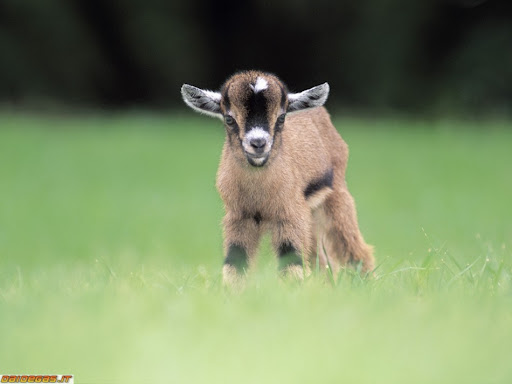

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

file_path = "goat.png" # path of the desidered image
img = cv2.imread(file_path, 1) # read the image in coloured mod. An alternative is cv2.imread(file_path, cv2.IMREAD_UNCHANGED)

#cv2.imshow(img) # cv2.imshow gives problems with Colab, so a Colab-specific version has been implemented (cv2_imshow())
cv2_imshow(img)

OpenCV by convention reads images in the RGB colour space with the following channel order: BGR. So the first channel is the blue colour, the second the green colours, and so on. BGR and RGB represent the same colour space, the only difference is the order of the colour channels.

**Rotation**

`cv2.rotate()` method is used to rotate a 2D array in multiples of 90 degrees. This function rotates the array in three different ways.
The following is the syntax for this function:

`cv2.rotate(src, rotateCode)`:

* *src* [required]: Input array;
* *rotateCode* [required]: It is an enum to specify how to rotate the array.
The following three constants can be specified in *rotateCode*: 
1. cv2.ROTATE_90_CLOCKWISE
2. cv2.ROTATE_90_COUNTERCLOCKWISE
3. cv2.ROTATE_180

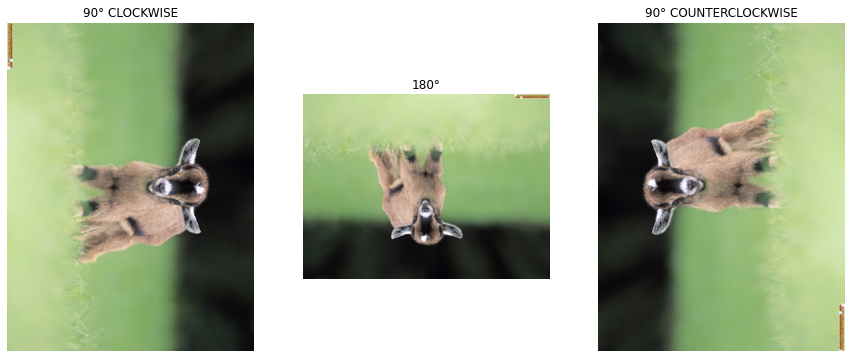

In [ ]:
# Let's see some rotation exmple
image_rot_90 = cv2.rotate(img, cv2.cv2.ROTATE_90_CLOCKWISE) 
image_rot_180 = cv2.rotate(img, cv2.cv2.ROTATE_180)
image_rot_90_counter = cv2.rotate(img, cv2.cv2.ROTATE_90_COUNTERCLOCKWISE)


f = plt.figure(figsize=(15,15)) # create a new figure

f.add_subplot(1, 3, 1).set_title('90° CLOCKWISE') # add three subplots to display the 3 images in the same figure.
# As we said above OpenCV use the BGR convention to read coloured images. 
# But matplotlib.pyplot library uses the RGB convention, so we have to apply a colour space conversion
# (the conversion from BGR and RGB does not represent a true colour space conversion, since 
# the only difference, as already mentioned, is the channels order).
# We will examine this in depth later.
plt.imshow(cv2.cvtColor(image_rot_90, cv2.COLOR_BGR2RGB))
plt.axis('off')

f.add_subplot(1, 3, 2).set_title('180°')
plt.imshow(cv2.cvtColor(image_rot_180, cv2.COLOR_BGR2RGB))
plt.axis('off')

f.add_subplot(1, 3, 3).set_title('90° COUNTERCLOCKWISE')
plt.imshow(cv2.cvtColor(image_rot_90_counter, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

To perform a custom rotation in OpenCV we need to create a rotation matrix and them apply affine transform on it.
OpenCV provides the `cv2.getRotationMatrix2D()` function to create the above transformation matrix.

The following is the syntax for creating the 2D rotation matrix:

`cv2.getRotationMatrix2D(center, angle, scale)`:

* *center* [required]: the center of rotation for the input image
* *angle* [required]: the angle of rotation in degrees
* *scale* [required]: an isotropic scale factor which scales the image up or down according to the value provided

If the angle is positive, the image gets rotated in the counter-clockwise direction. If you want to rotate the image clockwise by the same amount, then the angle needs to be negative.

Then, you can apply the affine transformation to the image, using the rotation matrix you created previously. You can use `warpAffine()`, this function applies an affine transformation to the image. 

After applying affine transformation, all the parallel lines in the original image will remain parallel in the output image as well.

The syntax for `cv2.warpAffine()` is the following:

`cv2.warpAffine(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]])`

The following are the arguments of the function:
* *src* [required]: the source image
* *M* [required]: the transformation matrix
* *dsize* [required]: size of the output image
* *dst* [optional]: the output image
* *flags* [optional]: combination of interpolation methods such as INTER_LINEAR or INTER_NEAREST
* *borderMode* [optional]: the pixel extrapolation method
* *borderValue* [optional]: the value to be used in case of a constant border, has a default value of 0

In [ ]:
# Let's create a function to perform a custom rotation
def rotate(image, angle, center = None, scale = 1.0):
    (h, w) = image.shape[:2] # the size of the output image is the same of the original one

    if center is None:
        center = (w / 2, h / 2) # we set the centre of rotation as the centre of the input image

    # Perform the rotation
    M = cv2.getRotationMatrix2D(center, angle, scale) # create the rotation matrix
    rotated = cv2.warpAffine(image, M, (w, h)) # apply the affine transform

    return rotated # return the rotated image

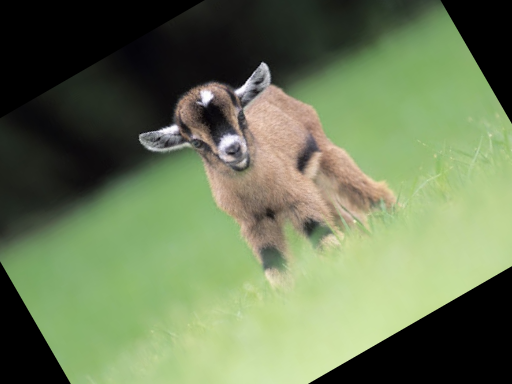

In [ ]:
# Let's show the rotaed version of the input image
cv2_imshow(rotate(img, 30, center = None, scale = 1.0))

**Flip**

The OpenCV function that flips the image vertically and horizontally is `cv2.flip()`.

The syntax for `cv2.flip()` is the following:

`cv2.flip(img, flipCode)`:

* *img* [required]: Input array;
* *flipCode* [required]: A flag to specify how to flip the array.
The image is flipped according to the following *flipCode* values:
1. *flipcode* = 0: flip vertically
2. *flipcode* > 0: flip horizontally
3. *flipcode* < 0: flip vertically and horizontally

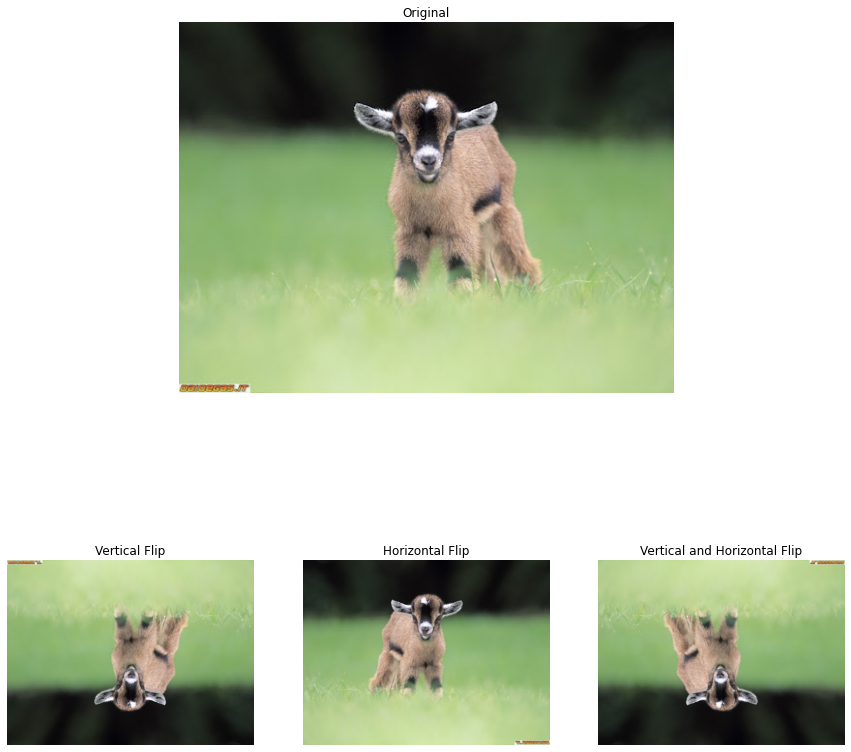

In [ ]:
# Let's see some flipping examples
img_flip_ud_ver = cv2.flip(img, 0) # flip the image vertically
img_flip_ud_hor = cv2.flip(img, 1) # flip the image horizontally
img_flip_ud_both = cv2.flip(img, -1) # flip the image both vertically and horizontally


f = plt.figure(figsize=(15,15)) # create a new figure

# show the original image
f.add_subplot(2, 3, (1, 3)).set_title('Original')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

# show the image the image flipped vertically
f.add_subplot(2, 3, 4).set_title('Vertical Flip')
plt.imshow(cv2.cvtColor(img_flip_ud_ver, cv2.COLOR_BGR2RGB))
plt.axis('off')

# show the image the image flipped horinzontally
f.add_subplot(2, 3, 5).set_title('Horizontal Flip')
plt.imshow(cv2.cvtColor(img_flip_ud_hor, cv2.COLOR_BGR2RGB))
plt.axis('off')

# shows the image flipped both vertically and horizontally
f.add_subplot(2, 3, 6).set_title('Vertical and Horizontal Flip')
plt.imshow(cv2.cvtColor(img_flip_ud_both, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

**Changing Colorspaces**

we can use `cv2.cvtColor()` function to convert the colorspace. Let's familiarize with the function and its parameters:

`cv2.cvtColor(src, code[, dst[, dstCn]])`:

* *src* [required]: It is the image whose color space is to be changed.
* *code* [required]: It is the color space conversion code. You can find a list of codes here: https://docs.opencv.org/3.4.15/d8/d01/group__imgproc__color__conversions.html
* *dst* [optional]: It is the output image of the same size and depth as src image.
* *dstCn* [optional]: It is the number of channels in the destination image. If the parameter is 0 then the number of the channels is derived automatically from src and code. It is an optional parameter.


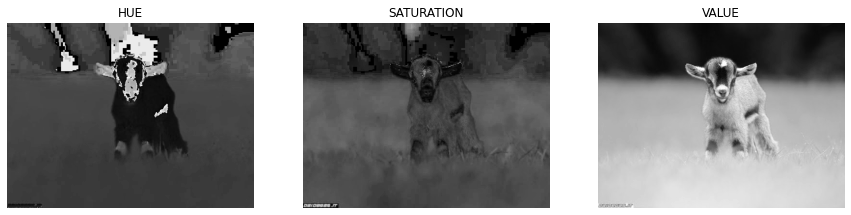

In [ ]:
# Let's see how transform the BGR image to HSV color space and display the features as gray scale images
im_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) # apply the color space conversion

f = plt.figure(figsize=(15,15))

f.add_subplot(1, 3, 1).set_title('HUE')
plt.imshow(im_hsv[:, :, 0], cmap = 'gray')
plt.axis('off')

f.add_subplot(1, 3, 2).set_title('SATURATION')
plt.imshow(im_hsv[:, :, 1], cmap = 'gray')
plt.axis('off')

f.add_subplot(1, 3, 3).set_title('VALUE')
plt.imshow(im_hsv[:, :, 2], cmap = 'gray')
plt.axis('off')

plt.show()

In the following cell we increase the brightness  of each pixel

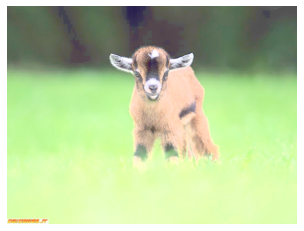

In [ ]:
value = 70 # increased brightness

im_hsv[:, :, 2] = cv2.add(im_hsv[:, :, 2], value) # increase saturation for each pixels

img_2 = cv2.cvtColor(im_hsv, cv2.COLOR_HSV2RGB) # apply the color space conversion, convert it to RGB

plt.imshow(img_2)    # show the new image
plt.axis('off')
plt.show()

**Resizing**

Resizing an image means changing the dimensions of it, be it width alone, height alone or changing both of them. Also, the aspect ratio of the original image could be preserved in the resized image. To resize an image, OpenCV provides `cv2.resize()` function.

The syntax of resize function is the following:

`cv2.resize(src, dsize[, dst[, fx[, fy[, interpolation]]]])`
where:
* *src*	[required]: source/input image
* *dsize*	[required]: desired size for the output image
* *fx*	[optional]: scale factor along the horizontal axis
* *fy*	[optional]: scale factor along the vertical axis
* *interpolation*	[optional]: flag that takes one of the following methods: 
1.   INTER_NEAREST – a nearest-neighbor interpolation INTER_LINEAR – a bilinear interpolation (used by default);
2.   INTER_AREA – resampling using pixel area relation. It may be a preferred method for image decimation, as it gives moire’-free results. But when the image is zoomed, it is similar to the INTER_NEAREST method;
3.   INTER_CUBIC – a bicubic interpolation over 4×4 pixel neighborhood;
4.   INTER_LANCZOS4 – a Lanczos interpolation over 8×8 pixel neighborhood


**Preserve Aspect Ratio (height to width ratio of image is preserved)**

Original Dimensions :  (384, 512, 3)
Resized Dimensions :  (153, 204, 3)


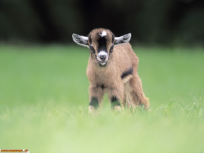

In [ ]:
# Downscale the original image

print('Original Dimensions : ', img.shape)

scale_percent = 40 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height) # new dimensions

resized_down = cv2.resize(img, dim, interpolation = cv2.INTER_AREA) # resize the image

print('Resized Dimensions : ',resized_down.shape)

cv2_imshow(resized_down)

Original Dimensions :  (384, 512, 3)
Resized Dimensions :  (1920, 2560, 3)


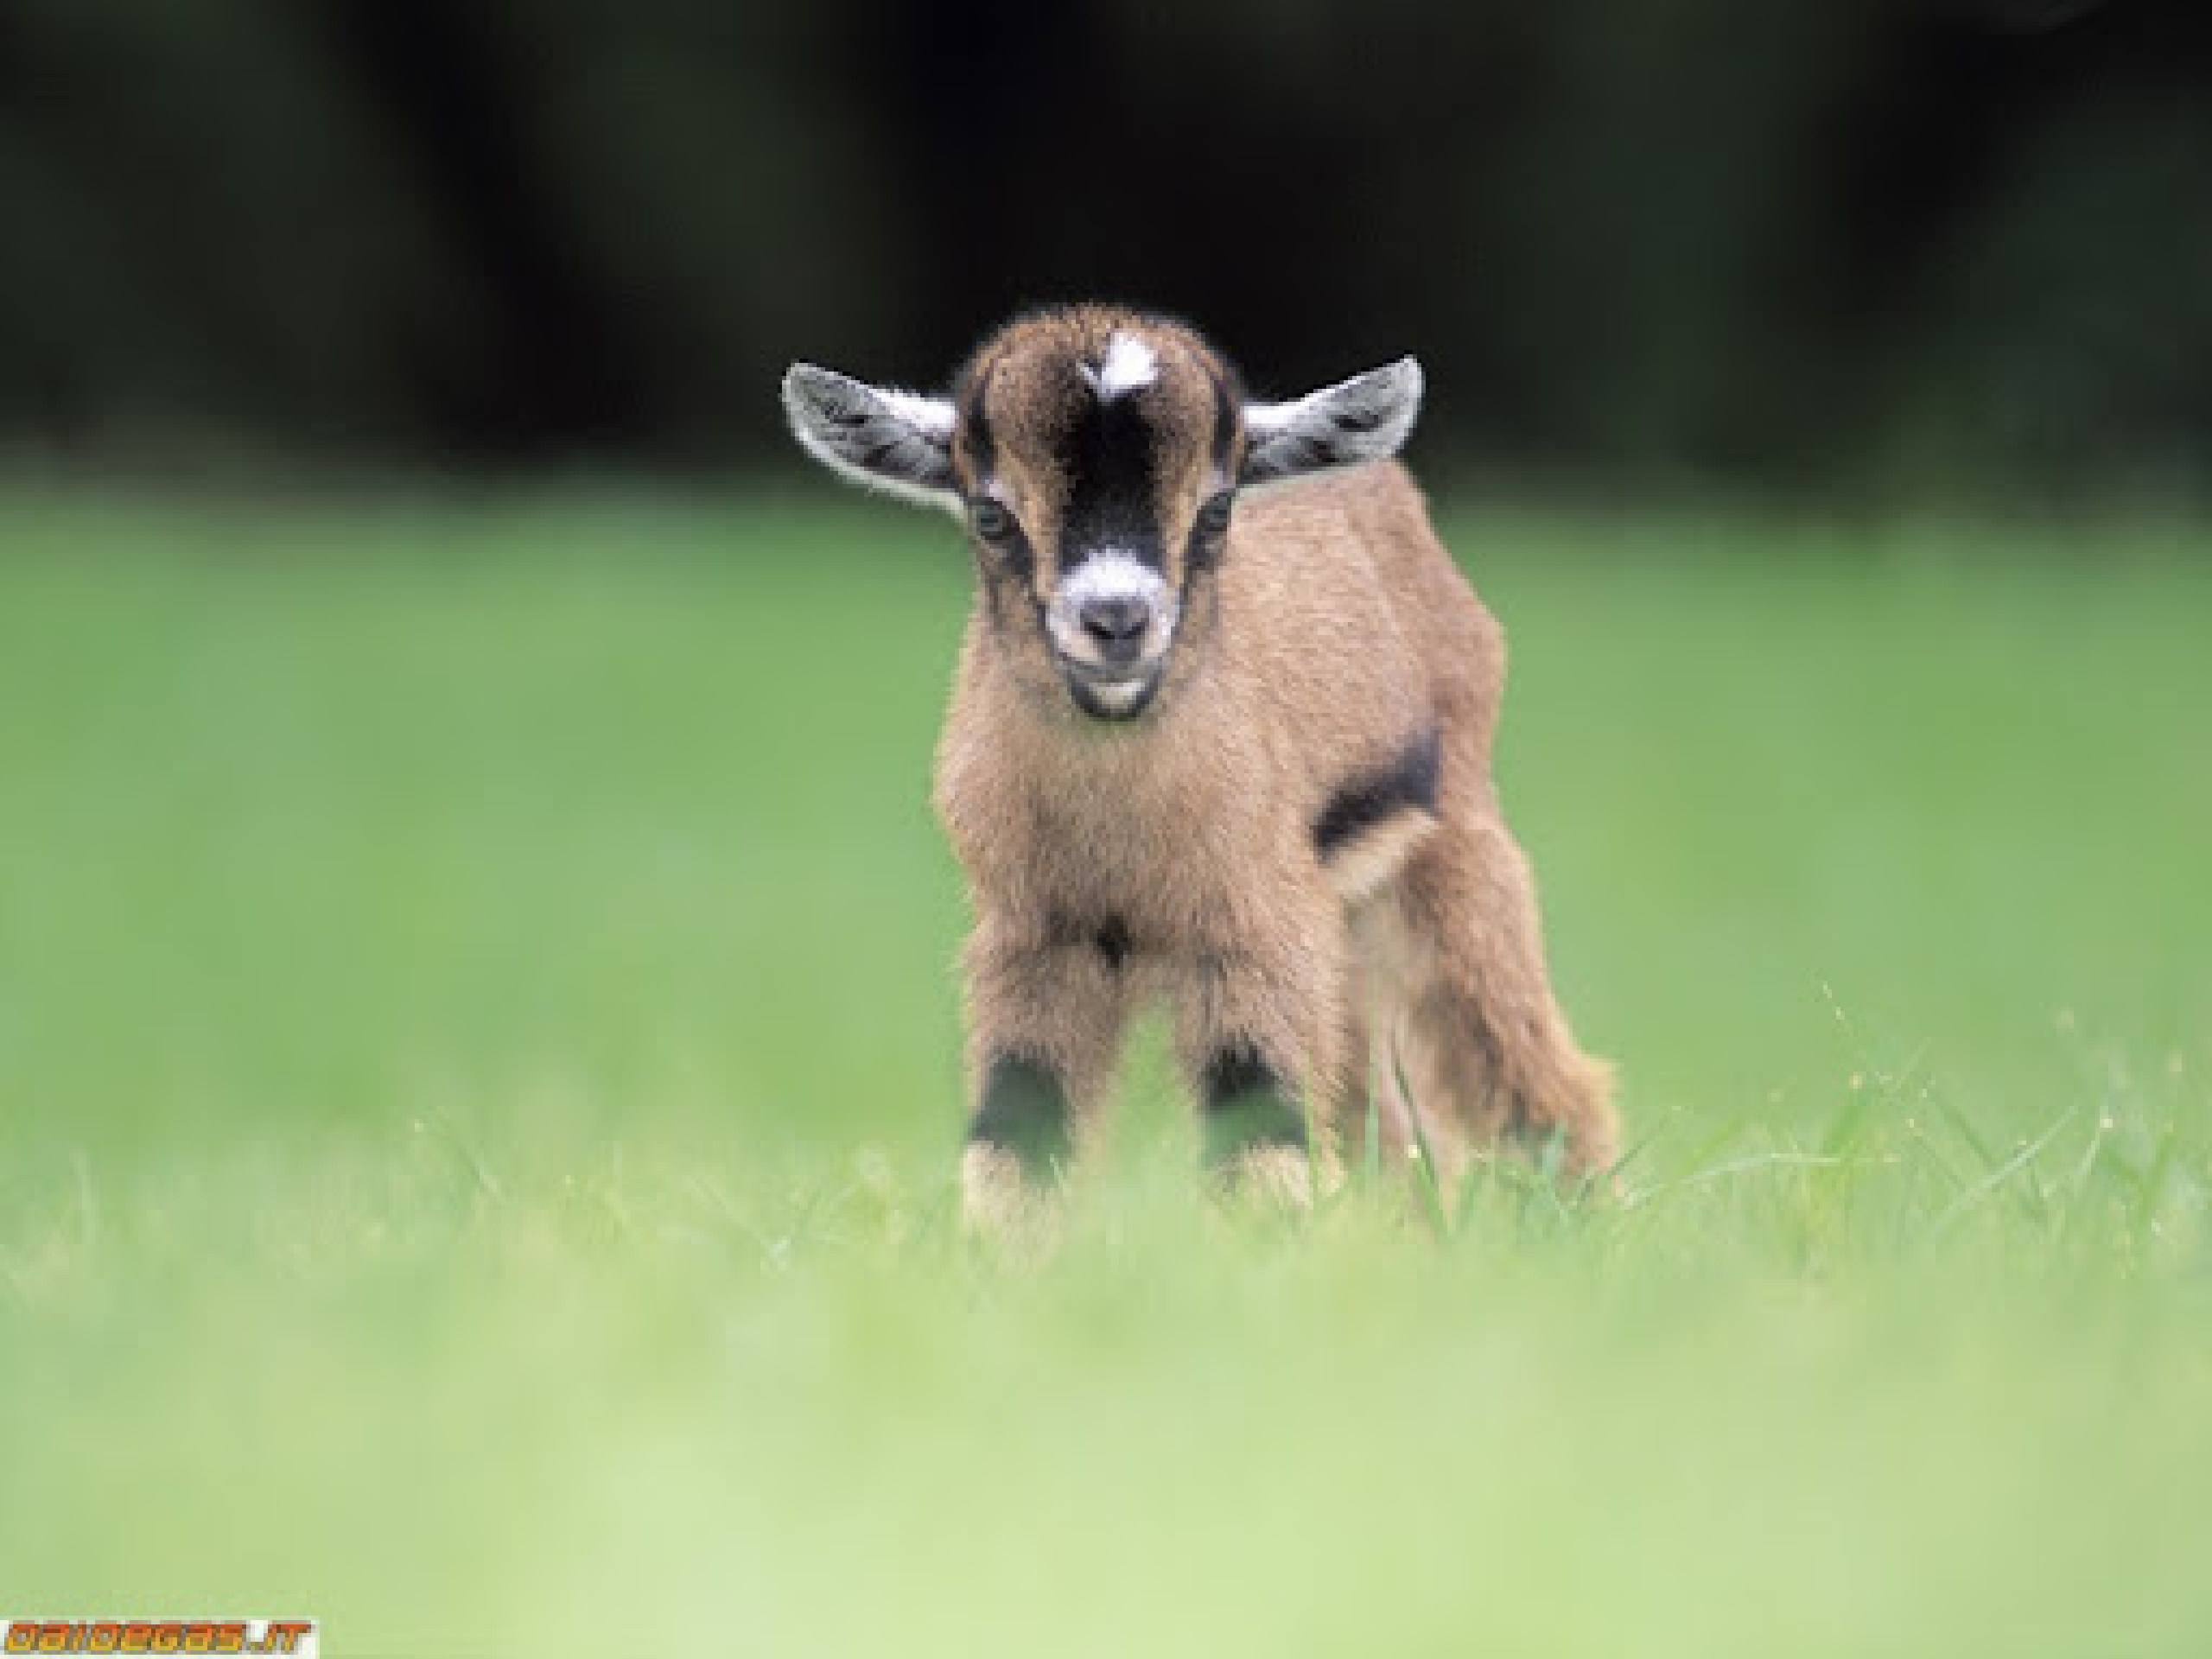

In [ ]:
# Upscale the original image
print('Original Dimensions : ',img.shape)

scale_percent = 500 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height) # new dimensions

resized_up = cv2.resize(img, dim, interpolation = cv2.INTER_AREA) # resize the image
print('Resized Dimensions : ',resized_up.shape)

cv2_imshow(resized_up)

**Do not preserve Aspect Ratio**

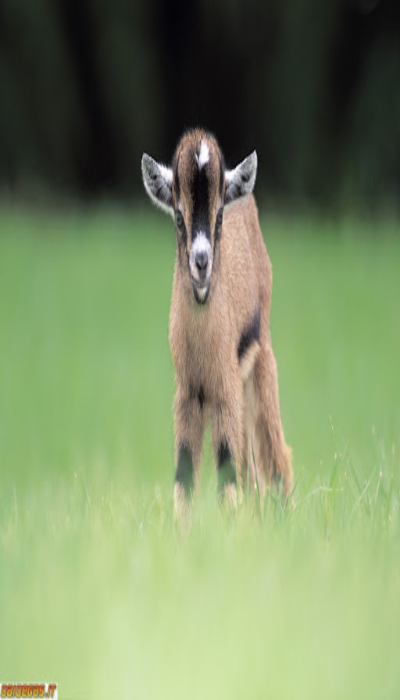

In [ ]:
# We can also not preserve the original aspect ratio
img_res = cv2.resize(img, (400, 700), cv2.INTER_CUBIC)
cv2_imshow(img_res)

#Image statistics

**Histogram**

So now we use `cv.calcHist()` function to find the histogram. Let's familiarize with the function and its parameters :

`cv.calcHist(images, channels, mask, histSize, ranges)`:
* *images* [required]: it is the source image of type uint8 or float32. it should be given in square brackets, ie, "[img]".
* *channels* [required]: it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.
* *mask* [required]: mask image. To find histogram of full image, it is given as "None". But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. (I will show an example later.)
* *histSize* [required]: this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].
* *ranges* [required]: this is our RANGE. Normally, it is [0, 256].

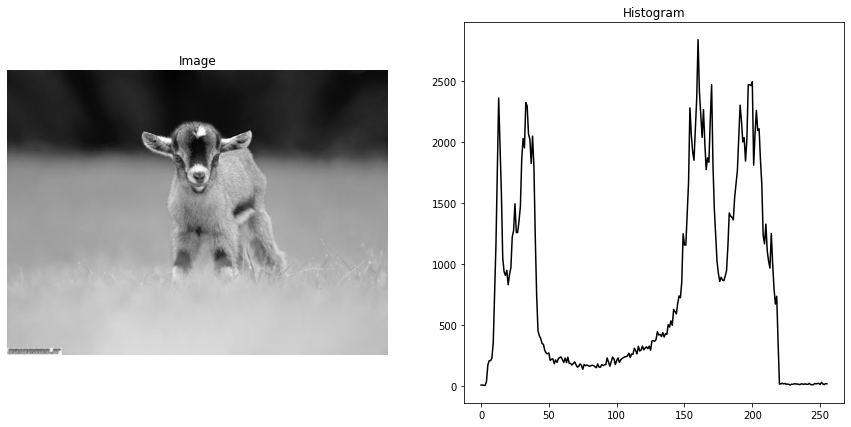

In [ ]:
img = cv2.imread('goat.png', 0) # read a grayscale image

hist = cv2.calcHist([img], [0], None , [256], [0, 256]) # apply the calcHist function. In this case we have a Grayscale image, so we put 0. In this case we don't use a mask.

f = plt.figure(figsize=(15,7)) # create a figure

f.add_subplot(1, 2, 1).set_title('Image') # add a sub_plot
plt.imshow(img, cmap="gray") # show the original image
plt.axis('off')

f.add_subplot(1, 2, 2).set_title('Histogram') # add another sub plot
plt.plot(hist, color = "black") # plot the histogram just calculated

The peak on the left of the histogram is due to the background of the image, as this area is dominated by dark pixels.

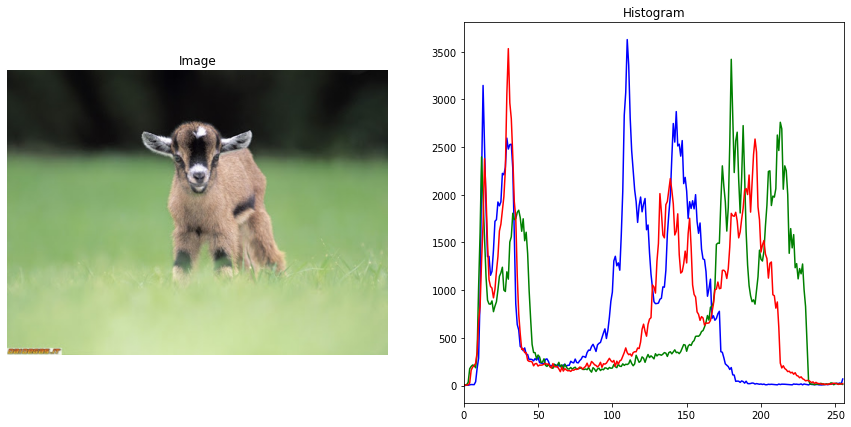

In [ ]:
# Now we will se an histogram of a color image. We will compute the hist for all three channels.

color = ('b', 'g', 'r') # Let's define a tuple, with the relative labels.

img = cv2.imread('goat.png', 1) # read a coloured image

f = plt.figure(figsize=(15,7)) # create a new figure
f.add_subplot(1, 2, 1).set_title('Image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # plot the original RGB image
plt.axis('off')

f.add_subplot(1, 2, 2).set_title('Histogram')
# now we will compute the histogram for all three channels with an iterative for cycle.
# As already said, since OpenCV uses BGR sorting for the RGB colour space, we calculate the histogram with this order. 
for i, col in enumerate(color): 
  hist = cv2.calcHist([img], [i], None, [256], [0,256])
  plt.plot(hist, color = col) # plot each histogram
  plt.xlim([0,256])
plt.show()

**Histogram Mask**

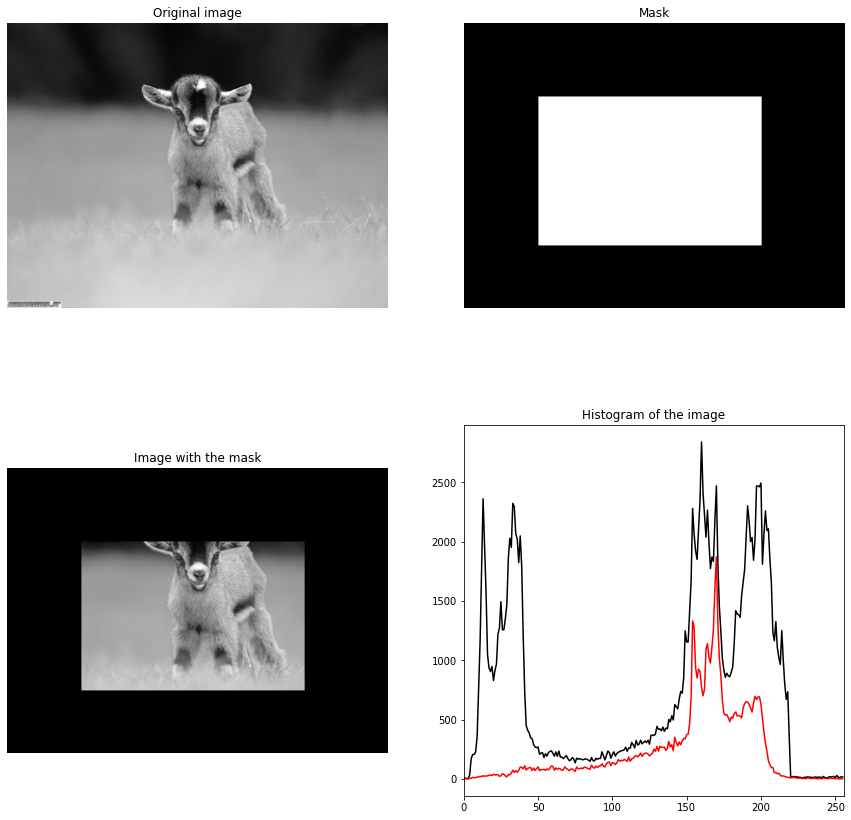

In [ ]:
# Now we will see how the compute the histogram of a particular area of the image.
# We apply a mask to highlight a specific area of the image. In our case the central zone.

import numpy as np

img = cv2.imread('goat.png', 0) # read the grayscale image

# create a mask
mask = np.zeros(img.shape[:2], np.uint8) # we create a total black image of the same size of the original one
mask[100:300, 100:400] = 255 # make the pixels in the central area white.
# now mask is a matrix with 2 value, a binary matrix. In other world we have a black and with image.
masked_img = cv2.bitwise_and(img, img,mask = mask) # apply the mask with the cv2.bitwise_and function. 

# Calculate histogram with mask and without mask
hist_full = cv2.calcHist([img], [0], None, [256], [0,256])
hist_mask = cv2.calcHist([img], [0], mask, [256], [0,256]) # Check third argument for mask

f = plt.figure(figsize=(15,15))

f.add_subplot(2, 2, 1).set_title('Original image')
plt.imshow(img, 'gray')
plt.axis('off')

f.add_subplot(2, 2, 2).set_title('Mask')
plt.imshow(mask,'gray')
plt.axis('off')

f.add_subplot(2, 2, 3).set_title('Image with the mask')
plt.imshow(masked_img, 'gray')
plt.axis('off')

f.add_subplot(2, 2, 4).set_title('Histogram of the image')
plt.plot(hist_full, "black") # in black plot the histogram of the original image.
plt.plot(hist_mask, "red") # in red plot the histogram of the masked version.
plt.xlim([0, 256])
plt.show()

We can see how removing the black background in the version with the mask, deletes the left peak of the histogram. In fact, in the red version of the histogram we have removed the first peak that corresponds to dark pixel values.

**GLCM**

Let's see a quick example.
Let's consider a 4-by-4 image with 3 intensity levels of pixel values (i.e 0, 1, 2). So the relative GLCM matrix is a 3-by-3 matrix. The following GLCM is computed with the following parameterd:
1. Distance = 1
2. Angle = 0

So, we are looking for pairs of pixels in the horizontal plane.

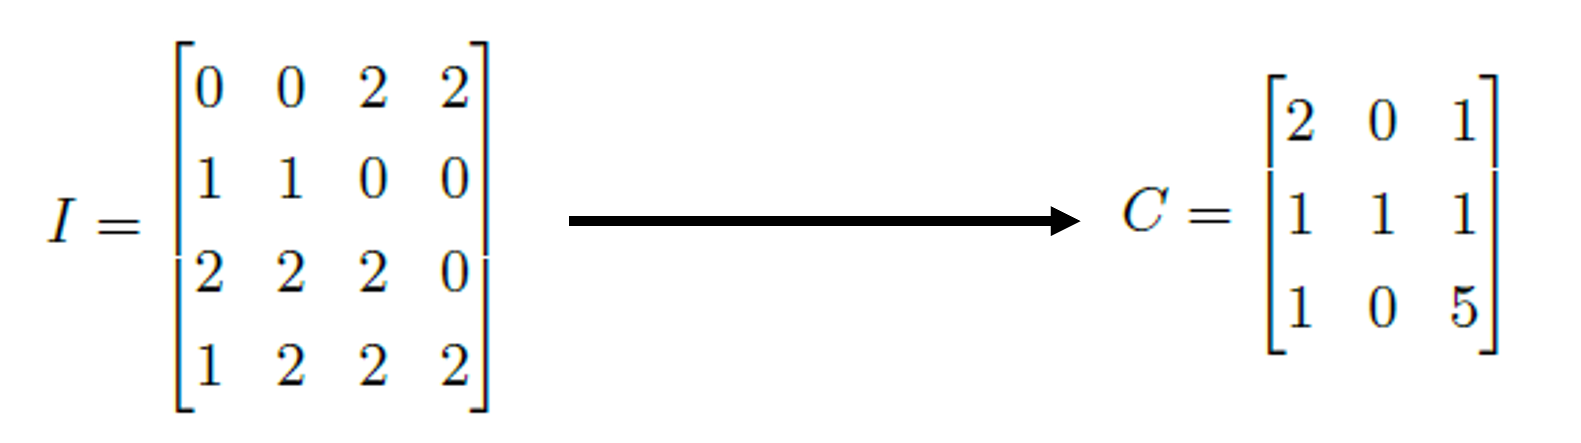

For this example we will use **scikit-image**, it is a Python library which contains a collection of algorithms for image processing.

So now we use `greycomatrix()` function to compute the GLCM. Let's familiarize with the function and its parameters :

`greycomatrix(image, distances, angles, levels=256, symmetric=False, normed=False)`:

*   *image* [required]: Integer typed input image. The image will be cast to uint8, so the maximum value must be less than 256;
*   *distances* [required]: List of pixel pair distance offsets;
*   *angles* [required]: List of pixel pair angles in radians;
*    *levels* [optional]: The input image should contain integers in [0, levels-1], where levels indicate the number of grey-levels counted (typically 256 for an 8-bit image). The maximum value is 256,
*   *symmetric* [optional]: If True, the output matrix P[:, :, d, theta] is symmetric. This is accomplished by ignoring the order of value pairs, so both (i, j) and (j, i) are accumulated when (i, j) is encountered for a given offset. The default is False;
*   *normed* [optional]: If True, normalize each matrix P[:, :, d, theta] by dividing by the total number of accumulated co-occurrences for the given offset. The elements of the resulting matrix sum to 1. The default is False.

Finally, we can use `greycoprops()` function to calculate texture properties from GLCM matrix, these serve as a compact summary of the matrix. Let's familiarize with the function and its parameters:

`greycoprops(P, prop='contrast')`:

*   *P* [required]: Input array. P is the grey-level co-occurrence histogram for which to compute the specified property. The value P[i,j,d,theta] is the number of times that grey-level j occurs at a distance d and at an angle theta from grey-level i.
*   *prop* [required]: The property of the GLCM to compute. The default is ‘contrast’.

As a quick recap the properties are computed as follows:

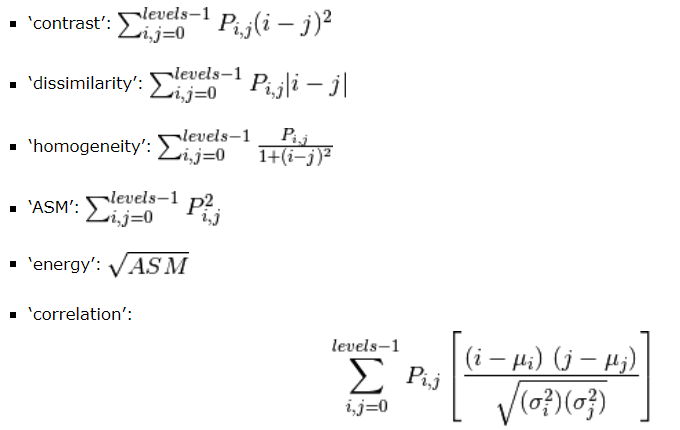





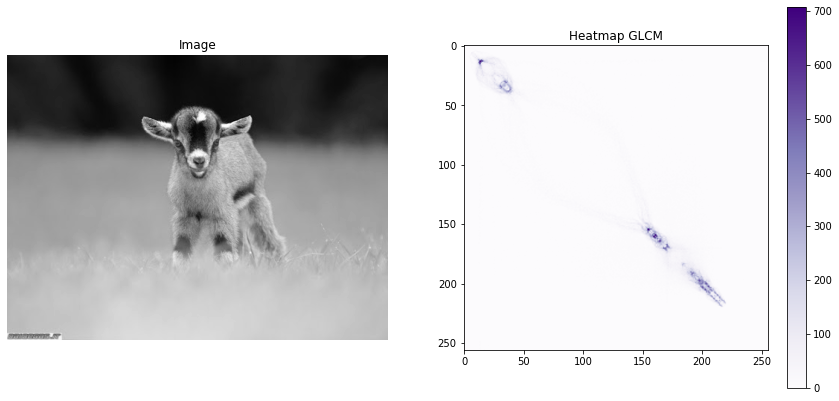

In [ ]:
# Let us see a quick example of how to use these functions.
from skimage.feature import greycomatrix, greycoprops

img = cv2.imread('goat.png', 0) # Upload the grayscale image

glcm = greycomatrix(img, distances=[20], angles=[3*np.pi/4], levels=256, symmetric=True, normed=False) # apply the graycomatrix() function and compute the GLCM matrix.
# In this case we have a 8-bit image, so we have 256 gray level intensities. 

# Let's create a new figure
f = plt.figure(figsize=(15, 7))

# Add a new subplot to plot the original image
f.add_subplot(1, 2, 1).set_title('Image')
plt.grid(None)
plt.imshow(img, cmap = 'gray') # we specify the relative cmap to be used
plt.axis('off')

# Add a new subplot to plot the heatmap of the GLCM matrix
f.add_subplot(1, 2, 2).set_title('Heatmap GLCM')
hm = plt.imshow(glcm[:, :, 0, 0], cmap='Purples', interpolation="spline16")
plt.colorbar(hm)
# The map shows the GLCM matrix, where each point in the map is coloured according to its GLCM value.

The map shows the GLCM matrix, where each point in the map represents a value of the GLCM matrix and is coloured according to its value. 
Each point on the map has coordinates related to the indices of the GLCM matrix.
Darker values of the points correspond to higher occurrences, vice versa, lighter values correspond to lower occurrences of the grey levels.

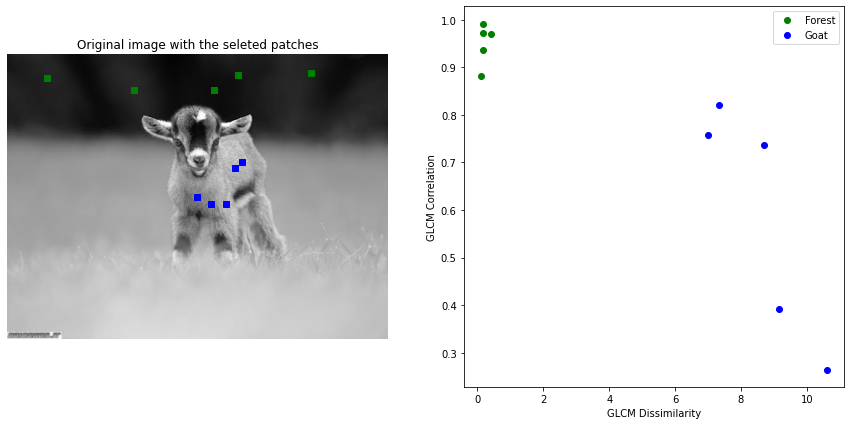

In [ ]:
# Let's see another example. This time we also extract Haralick features from the GLCM matrix.
from skimage.feature import greycomatrix, greycoprops

img = cv2.imread('goat.png', 0) # upload the grayscale image

# Let's select a few patches within the image to see how the texture features vary at various positions.
PATCH_SIZE = 21 # We considerpatches of size 21-by-21.

# select some patches from the forest areas
grass_locations = [(37, 267), (15, 398), (17, 299), (38, 159), (22, 43)] # we create a list of tuples indicating the position of the selected pixels
grass_patches = []
# now we create a list of patches extracted from the original image. The patches are craeted using the position just selected.
for loc in grass_locations:
    grass_patches.append(img[loc[0]:loc[0] + PATCH_SIZE, loc[1]:loc[1] + PATCH_SIZE])

# select some patches from goat
goat_locations = [(142, 295), (191, 263), (191, 283), (135, 305), (182, 245)]
goat_patches = []
for loc in goat_locations:
    goat_patches.append(img[loc[0]:loc[0] + PATCH_SIZE, loc[1]:loc[1] + PATCH_SIZE])

# compute some GLCM properties for each patch
xs = []
ys = []
for patch in (grass_patches + goat_patches):
    glcm = greycomatrix(patch, distances=[1], angles=[np.pi/2], levels=256, symmetric=True, normed=True)
    xs.append(greycoprops(glcm, 'dissimilarity')[0, 0])
    ys.append(greycoprops(glcm, 'correlation')[0, 0])

# create a new figure
f = plt.figure(figsize=(15, 7))

# display original image with locations of patches
f.add_subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original image with the seleted patches')
for (y, x) in grass_locations:
    plt.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'gs')
for (y, x) in goat_locations:
    plt.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'bs')

#for each patch, plot dissimilarity, correlation
f.add_subplot(1, 2, 2)
plt.plot(xs[:len(grass_patches)], ys[:len(grass_patches)], 'go',
        label='Forest')
plt.plot(xs[len(grass_patches):], ys[len(grass_patches):], 'bo',
        label='Goat')
plt.xlabel('GLCM Dissimilarity')
plt.ylabel('GLCM Correlation')
plt.legend()

We can see how the different regions (goat and forest) have different textures, characterised by a clear division of the samples (the extracted patches in our case) in the scatter plot. In this case, the samples are characterised by only two features (i.e. dissimilarity and correlation).

## Now it's your turn

**Recognizing hand-written digits**
The aim is to recognise images of handwritten digits, from 0-9, using the tools seen today. 

You can solve the task in any way you want.

**Mandatory requirements**

In [ ]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets
from sklearn import datasets

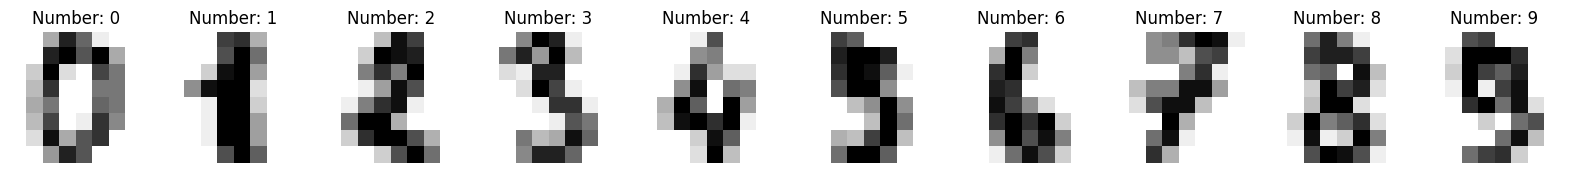

In [ ]:
# Let's see an example of the dataset to be used
digits = datasets.load_digits() # Upload the dataset save it into the digits variable
# Digits contains our dataset.

# Let's take a few examples
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(20, 5))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Number: %i' % label)

**Time: 30 minutes**